# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os                                               #os interface library 
import requests                                         #HTTP requests library
import pandas as pd                                     #panda library
from dotenv import load_dotenv                          #dotenv library to read keys and secrect key for api
import alpaca_trade_api as tradeapi                     #Alpaca library
#from alpaca_trade_api.rest import REST, TimeFrame       #Alpaca trading library
from MCForecastTools import MCSimulation                #Monta Carlos simulation apis
import json                                             #JSON library ro work with JSON objects
from datetime import date                               #Data-Time library

#set the backend of matplotlib to the 'inline' backend 
%matplotlib inline                 

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url).json()                        #Retrieve BTC data
#print(json.dumps(btc_response_data, indent=4))
btc_cad = btc_response_data["data"]["1"]["quotes"]["CAD"]["price"]      #Extract the CAD price for BTC

# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()                        #Get ETH data
#print(json.dumps(eth_response_data, indent=4))
eth_cad = eth_response_data["data"]["1027"]["quotes"]["CAD"]["price"]   #extract the CAD price for ETH

# Compute current value of my crpto
my_btc_value = btc_cad * my_btc
my_eth_value = eth_cad * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:,.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:,.2f}")

The current value of your 1.2 BTC is $66,416.73
The current value of your 5.3 ETH is $20,637.72


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key=os.getenv("ALPACA_API_KEY")
alpaca_secret_key=os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [8]:
# Format current date as ISO format
#today = pd.Timestamp(date.today(), tz="America/New_York").isoformat()
today =  pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()    #As per BCS learning, This date gives more data

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"     #With new release of Alpaca API, this is not working. 
timeframe = "1Day"   #Using this value

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
portfolio = alpaca.get_bars(tickers, timeframe, start=today,  limit=1000, adjustment='raw').df

#Rearranging the data fame to separate ticker data
AGG = portfolio[portfolio["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = portfolio[portfolio["symbol"]=="SPY"].drop("symbol", axis=1)
portfolio = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])         #Concat the re-arranged dfs to one df

# Preview DataFrame
portfolio.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2020-05-01 04:00:00+00:00  116.97  117.0998  116.6775  116.87  6099893   
2020-05-04 04:00:00+00:00  116.89  117.0900  116.8700  116.97  3684081   
2020-05-05 04:00:00+00:00  116.96  116.9700  116.8100  116.88  4612127   
2020-05-06 04:00:00+00:00  116.44  116.7100  116.3000  116.41  6394949   
2020-05-07 04:00:00+00:00  116.61  116.7700  116.4200  116.77  3788632   

                                                      SPY                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2020-05-01 04:00:00+00:00       24395  116.846123  285.16  290.6572  281.5200   
2020-05-04 04:00:00+00:00       15545  116.960599  280.46  283.9000  279.1300   
2020-05-05 04:00:00+00:00       15150  116.879635  286.66  289.2500  283.7134   
2020-05-06 04:00:00+00:00       20233  116.426742  288.01  288.4600  283.7800   
2020-05-07 04:00:00+00:00       15964  116.641830  287.79  289.7800  287.1300   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2020-05-01 04:00:00+00:00  282.79  125180028      639987  284.092832  
2020-05-04 04:00:00+00:00  283.57   80883545      460682  281.765323  
2020-05-05 04:00:00+00:00  286.19   79569939      459764  287.400201  
2020-05-06 04:00:00+00:00  284.25   74234197      436223  286.083037  
2020-05-07 04:00:00+00:00  287.68   75250852      422689  287.989937

In [9]:
# Pick AGG and SPY close prices
agg_close_price = portfolio["AGG"]["close"].values[0]
spy_close_price = portfolio["SPY"]["close"].values[0]


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.87
Current SPY closing price: $282.79


In [10]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:,.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:,.2f}")

The current value of your 50 SPY shares is $14,139.50
The current value of your 200 AGG shares is $23,374.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_amount = {'amount': [my_btc_value + my_eth_value, my_spy_value + my_agg_value]}

# Create savings DataFrame
df_savings = pd.DataFrame(total_amount, index= ["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,87054.453914
shares,37513.500000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

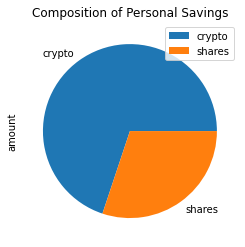

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum().item()

# Validate saving health
if (total_savings > emergency_fund):
    print("Congratulations! You having more than 3 time the your monthly income in your emergency fund.")
    print(f"Emergency fund is ${emergency_fund:,.2f}, and your savings is ${total_savings:,.2f}")
    
elif (total_savings == emergency_fund):
    print("Congratulations! You have archived the financialgoal. Your emegency fund and total saving is equal.")
    print(f"Emergency fund is ${emergency_fund:,.2f}, and your savings is ${total_savings:,.2f}")
else:
    print("You have not archieved your finanacial goal. Your total saving is less than your emegency fund.")
    print(f"Emergency fund is ${emergency_fund}:,.2f, and your savings is ${total_savings}:,.2f")


Congratulations! You having more than 3 time the your monthly income in your emergency fund.
Emergency fund is $36,000.00, and your savings is $124,567.95


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
#start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()  <-- this date is not returning any data for SPY
start_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()   #BCS Learning Assist told me to change the date to this
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
stock_data = alpaca.get_bars(
                tickers, 
                timeframe,                    #timeframe=1Day
                start=start_date, 
                #end=end_date,                #As per BCS Learning, removed end date
                limit=1000).df

#Rearranging the data fame to separate ticker data
AGG = stock_data[stock_data["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = stock_data[stock_data["symbol"]=="SPY"].drop("symbol", axis=1)
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])         #Concat the re-arranged dfs

# Display sample data
display(df_stock_data)

AGG                                        \
                             open      high       low   close    volume   
timestamp                                                                 
2020-05-01 04:00:00+00:00  116.97  117.0998  116.6775  116.87   6099893   
2020-05-04 04:00:00+00:00  116.89  117.0900  116.8700  116.97   3684081   
2020-05-05 04:00:00+00:00  116.96  116.9700  116.8100  116.88   4612127   
2020-05-06 04:00:00+00:00  116.44  116.7100  116.3000  116.41   6394949   
2020-05-07 04:00:00+00:00  116.61  116.7700  116.4200  116.77   3788632   
...                           ...       ...       ...     ...       ...   
2022-03-21 04:00:00+00:00  107.58  107.6490  106.9841  107.04   7583668   
2022-03-22 04:00:00+00:00  106.74  106.8800  106.6100  106.75  16048681   
2022-03-23 04:00:00+00:00  106.96  107.2100  106.7105  107.19   8567200   
2022-03-24 04:00:00+00:00  106.72  107.0350  106.6500  106.95   7378690   
2022-03-25 04:00:00+00:00  106.65  106.6500  105.9750  106.10  10295813   

                                                      SPY                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2020-05-01 04:00:00+00:00       24395  116.846123  285.16  290.6572  281.5200   
2020-05-04 04:00:00+00:00       15545  116.960599  280.46  283.9000  279.1300   
2020-05-05 04:00:00+00:00       15150  116.879635  286.66  289.2500  283.7134   
2020-05-06 04:00:00+00:00       20233  116.426742  288.01  288.4600  283.7800   
2020-05-07 04:00:00+00:00       15964  116.641830  287.79  289.7800  287.1300   
...                               ...         ...     ...       ...       ...   
2022-03-21 04:00:00+00:00       27316  107.310151  444.45  446.4600  440.6800   
2022-03-22 04:00:00+00:00       51796  106.746967  445.99  450.5800  445.8600   
2022-03-23 04:00:00+00:00       27348  106.991875  446.90  448.4900  443.7100   
2022-03-24 04:00:00+00:00       23320  106.879605  445.82  450.5000  444.7600   
2022-03-25 04:00:00+00:00       37569  106.190724  451.09  452.9800  448.4300   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2020-05-01 04:00:00+00:00  282.79  125180028      639987  284.092832  
2020-05-04 04:00:00+00:00  283.57   80883545      460682  281.765323  
2020-05-05 04:00:00+00:00  286.19   79569939      459764  287.400201  
2020-05-06 04:00:00+00:00  284.25   74234197      436223  286.083037  
2020-05-07 04:00:00+00:00  287.68   75250852      422689  287.989937  
...                           ...        ...         ...         ...  
2022-03-21 04:00:00+00:00  444.30   85377983      912432  443.796432  
2022-03-22 04:00:00+00:00  449.59   73674202      623610  448.558595  
2022-03-23 04:00:00+00:00  443.80   77982935      627281  446.058683  
2022-03-24 04:00:00+00:00  450.48   61411569      526865  447.609014  
2022-03-25 04:00:00+00:00  452.69   77199328      661033  451.047221  

[480 rows x 14 columns]

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_dist.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2020-05-01 04:00:00+00:00  116.97  117.0998  116.6775  116.87  6099893   
2020-05-04 04:00:00+00:00  116.89  117.0900  116.8700  116.97  3684081   
2020-05-05 04:00:00+00:00  116.96  116.9700  116.8100  116.88  4612127   
2020-05-06 04:00:00+00:00  116.44  116.7100  116.3000  116.41  6394949   
2020-05-07 04:00:00+00:00  116.61  116.7700  116.4200  116.77  3788632   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2020-05-01 04:00:00+00:00       24395  116.846123          NaN  285.16   
2020-05-04 04:00:00+00:00       15545  116.960599     0.000856  280.46   
2020-05-05 04:00:00+00:00       15150  116.879635    -0.000769  286.66   
2020-05-06 04:00:00+00:00       20233  116.426742    -0.004021  288.01   
2020-05-07 04:00:00+00:00       15964  116.641830     0.003093  287.79   

                                                                              \
                               high       low   close     volume trade_count   
timestamp                                                                      
2020-05-01 04:00:00+00:00  290.6572  281.5200  282.79  125180028      639987   
2020-05-04 04:00:00+00:00  283.9000  279.1300  283.57   80883545      460682   
2020-05-05 04:00:00+00:00  289.2500  283.7134  286.19   79569939      459764   
2020-05-06 04:00:00+00:00  288.4600  283.7800  284.25   74234197      436223   
2020-05-07 04:00:00+00:00  289.7800  287.1300  287.68   75250852      422689   

                                                    
                                 vwap daily_return  
timestamp                                           
2020-05-01 04:00:00+00:00  284.092832          NaN  
2020-05-04 04:00:00+00:00  281.765323     0.002758  
2020-05-05 04:00:00+00:00  287.400201     0.009239  
2020-05-06 04:00:00+00:00  286.083037    -0.006779  
2020-05-07 04:00:00+00:00  287.989937     0.012067

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
import warnings                                         #Warning messags interface library
warnings.filterwarnings("ignore")                       #Subpress warning messages
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005148,1.012559,0.993415,1.004200,0.996021,0.993189,0.998374,1.008134,1.010493,1.010960,...,1.001903,1.002766,0.997245,0.993681,1.000585,1.005949,0.998680,1.011491,1.006018,0.992227
2,1.002397,1.021781,0.993752,1.002221,0.994048,0.997898,1.004329,1.002398,1.003714,1.003047,...,0.990827,1.000446,1.001036,0.987042,1.002883,1.001734,1.007947,1.010820,0.998039,0.977021
3,0.999288,1.025592,0.984079,0.997126,0.994218,1.008796,0.999354,0.995931,1.009297,0.999152,...,0.991413,1.005456,0.992372,0.974267,1.013315,1.004338,1.005494,1.017826,0.997831,0.985030
4,1.009548,1.030465,0.990117,0.998442,0.990443,0.998710,1.004175,0.996310,1.008118,0.997036,...,0.999416,1.004535,0.983310,0.971830,1.017047,1.005358,0.997519,1.015228,0.995690,0.990877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,25.425767,29.476920,61.762264,62.409262,35.568097,32.961171,37.384886,44.854411,57.122039,45.532542,...,84.755823,73.970588,32.510383,60.683279,48.570943,67.094155,9.343426,92.881611,101.275043,63.911196
7557,25.691468,29.563573,62.034584,62.906624,35.416264,33.171010,37.737587,45.067159,57.359540,45.200438,...,84.256447,73.607620,32.683634,60.999790,48.685021,67.045805,9.309470,93.669794,101.058935,63.516390
7558,25.847625,29.333664,62.488375,62.130652,35.488279,33.269725,37.658786,45.171119,57.885776,45.327969,...,84.136159,73.218012,32.157522,60.939147,49.013162,66.747914,9.233512,93.706214,100.833048,64.380412
7559,26.016622,29.313215,62.807510,61.847587,35.675000,33.265438,37.530453,44.919001,58.096111,45.286085,...,85.523017,73.193040,32.136815,61.027825,48.997851,67.325622,9.223916,94.877332,100.399837,64.681555


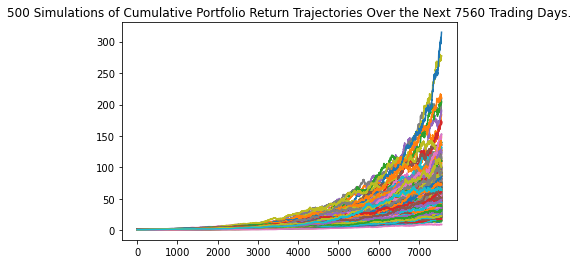

In [19]:
# Plot simulation outcomes
simulation_plot = MC_dist.plot_simulation()

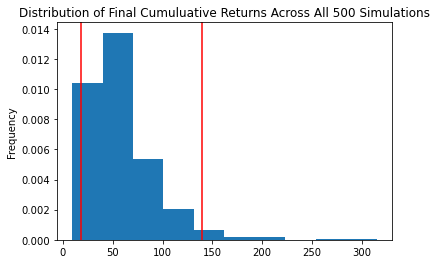

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_dist.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = MC_dist.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

count           500.000000
mean             58.895474
std              35.618468
min               9.242594
25%              35.087444
50%              51.370493
75%              72.363774
max             314.969525
95% CI Lower     17.974354
95% CI Upper    139.185946
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stats[8] * initial_investment, 2)
ci_upper = round(summary_stats[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.02f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,.02f} and ${ci_upper:,.02f}")

There is a 95% chance that an initial investment of $20,000.00 in the portfolio over the next 30 years will end within in the range of $359,487.09 and $2,783,718.93


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_stats[8] * initial_investment, 2)
ci_upper = round(summary_stats[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.02f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,.02f} and ${ci_upper:,.02f}")

There is a 95% chance that an initial investment of $30,000.00 in the portfolio over the next 30 years will end within in the range of $539,230.63 and $4,175,578.39


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist_five = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004027,1.000939,1.000036,0.998288,0.995638,0.989262,1.009915,0.997354,1.003491,1.013208,...,1.009805,1.002843,1.003498,0.995328,1.003980,1.010678,1.004468,1.001608,0.988761,1.005591
2,1.011053,0.993889,0.998596,1.010177,0.995328,0.985818,1.026864,0.996092,1.002869,1.005796,...,1.014787,1.002194,1.013121,0.989993,1.011216,1.012007,1.017364,1.003423,0.984249,1.028784
3,1.007273,1.000150,0.999136,1.004499,0.999666,0.985515,1.016019,0.997466,1.010833,1.008177,...,1.012857,1.016576,1.012793,0.994074,1.029581,1.020482,1.010734,1.001161,0.994033,1.033758
4,1.010798,1.003455,0.994602,1.005259,1.009930,0.983233,1.023021,0.988879,1.006148,1.004654,...,1.006595,1.020240,1.024375,0.989684,1.019074,1.027654,1.010458,1.011422,0.989026,1.036058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.855383,1.971623,1.489774,2.265717,1.525525,1.366907,3.511248,1.829206,1.780676,2.893538,...,1.904834,1.797487,1.882654,2.177079,1.647028,1.721845,1.925415,1.745242,1.648906,2.364729
1257,1.856291,1.971479,1.496989,2.268327,1.522825,1.379942,3.558902,1.836548,1.774336,2.895188,...,1.911406,1.795889,1.883738,2.201120,1.661563,1.729911,1.921278,1.730943,1.649513,2.369311
1258,1.861421,1.952090,1.506661,2.272164,1.521704,1.390273,3.527533,1.830100,1.781910,2.910015,...,1.915876,1.788507,1.870661,2.209915,1.663300,1.751941,1.905463,1.719769,1.655245,2.376138
1259,1.858798,1.949599,1.507204,2.251478,1.517569,1.380919,3.552795,1.823123,1.784152,2.915439,...,1.898895,1.775763,1.864096,2.229612,1.644210,1.762624,1.900193,1.730916,1.656758,2.372341


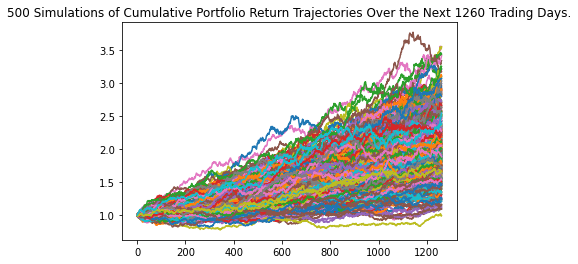

In [26]:
# Plot simulation outcomes
simulation_five_plot = MC_dist_five.plot_simulation()

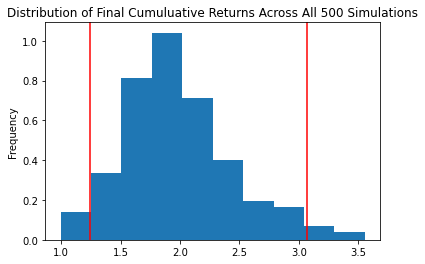

In [27]:
# Plot probability distribution and confidence intervals
dist_five_plot = MC_dist_five.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_five = MC_dist.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_five)

count           500.000000
mean             58.895474
std              35.618468
min               9.242594
25%              35.087444
50%              51.370493
75%              72.363774
max             314.969525
95% CI Lower     17.974354
95% CI Upper    139.185946
Name: 7560, dtype: float64


In [29]:
# Set initial investment
initial_inv_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_stats_five[8] * initial_inv_five, 2)
ci_upper_five = round(summary_stats_five[9] * initial_inv_five, 2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_inv_five:,.02f} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:,.02f} and ${ci_upper_five:,.02f}")

There is a 95% chance that an initial investment of $60,000.00 in the portfolio over the next 5 years will end within in the range of $1,078,461.26 and $8,351,156.78


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# Stock ratio 80% and bond ration = 20%
MC_dist_ten = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.2,.8],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001049,0.984145,1.012742,1.012876,0.995263,1.006541,0.998838,0.998013,1.006207,0.996182,...,0.998628,0.995192,0.995950,1.009519,1.004421,1.009594,0.998438,0.986231,0.989021,1.001348
2,1.008906,0.991088,1.021371,1.024754,1.008609,0.992546,1.011715,1.012305,0.996628,0.998280,...,0.997538,0.983636,0.995282,1.016503,1.005409,1.006604,0.998573,0.990132,0.997094,1.002381
3,1.006362,0.996679,1.022193,1.032968,1.011290,0.997781,1.008661,1.015491,1.002571,0.985016,...,0.998546,0.985213,0.994674,1.022483,0.997744,1.005327,1.002528,0.992812,0.998804,0.989300
4,1.020896,0.995827,1.030736,1.049214,1.019111,0.999522,1.022931,1.021156,1.000588,0.973592,...,0.997711,0.980134,0.989329,1.018835,1.011095,1.014442,0.982061,0.989864,1.001592,0.986177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.782672,9.798508,3.071170,5.819194,1.919818,15.612493,10.542672,7.457392,6.429080,6.011227,...,11.450807,4.785287,6.391448,4.429195,9.399381,7.689254,4.385389,4.891653,10.001436,15.652211
2517,1.804319,9.823615,3.070775,5.812018,1.933077,15.454106,10.548881,7.452557,6.494093,6.007509,...,11.414866,4.819367,6.323937,4.489991,9.456103,7.655205,4.453520,4.920269,10.101341,15.604486
2518,1.807396,9.670114,3.095025,5.855925,1.941052,15.601105,10.397708,7.575010,6.482581,5.972482,...,11.391347,4.799046,6.264229,4.493000,9.528953,7.638013,4.479310,4.919589,10.104795,15.560296
2519,1.826494,9.795939,3.054506,5.921435,1.951272,15.485480,10.414509,7.526267,6.518304,5.929585,...,11.572366,4.799374,6.242841,4.508276,9.571068,7.642382,4.466896,4.958242,10.117543,15.523731


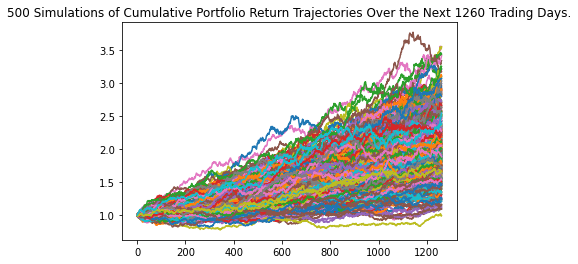

In [32]:
# Plot simulation outcomes
simulation_ten_plot = MC_dist_five.plot_simulation()

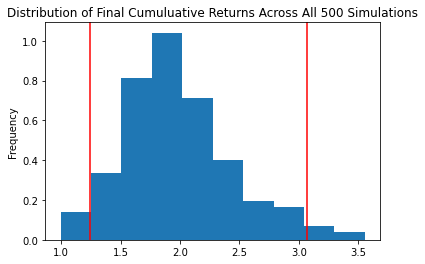

In [33]:
# Plot probability distribution and confidence intervals
dist_ten_plot = MC_dist_five.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_ten = MC_dist.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_ten)

count           500.000000
mean             58.895474
std              35.618468
min               9.242594
25%              35.087444
50%              51.370493
75%              72.363774
max             314.969525
95% CI Lower     17.974354
95% CI Upper    139.185946
Name: 7560, dtype: float64


In [35]:
# Set initial investment 30,000
init_inv_ten = 30000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_stats_ten[8] * init_inv_ten, 2)
ci_upper_ten = round(summary_stats_ten[9] * init_inv_ten, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${init_inv_ten:,.02f} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:,.02f} and ${ci_upper_ten:,.02f}")

There is a 95% chance that an initial investment of $30,000.00 in the portfolio over the next 10 years will end within in the range of $539,230.63 and $4,175,578.39
